In [12]:
# To force reloading. Useful when editing python files
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from processor_new import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotting_moose import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load profiler baseline
base_path = '/Users/sebastian/Documents/PharoImages/illimani-moose/'

# Load sampling 0.1%
path = base_path + '2024-03-15H14m38'
moose_df, metadata_moose_df = load_df(path)

# most allocated classes
top_allocated_classes = get_top_allocated_classes(moose_df)

In [13]:
print_table_allocations_average_lifetimes('', moose_df, metadata_moose_df)



Sampling rate: 1
Total instances:  62052799
Total execution time: 113.586432
Total full GCs:  5
Total scavenges:  786
Total allocated memory:  2.8703816905617714  GiB
----------
Allocated object class    Instances    Avg lifetime    Avg GC cycles    Avg Scavenges    Allocated memory
------------------------  -----------  --------------  ---------------  ---------------  ------------------
ByteString                24.14%       3.58%           1.97%            3.38%            13.92%
Array                     18.14%       24.76%          15.08%           22.65%           26.99%
WideString                14.84%       0.09%           0.12%            0.25%            19.55%
OrderedCollection         7.25%        14.34%          12.24%           13.79%           4.67%
ReadStream                6.54%        0.09%           0.11%            0.25%            4.21%
NumberParser              6.54%        0.09%           0.11%            0.25%            12.63%
FMFutureProperty          6.42% 

[Text(0.5, 0, 'Execution time'),
 Text(0.5, 1.0, 'Moose object lifetimes'),
 (0.0, 100.0)]

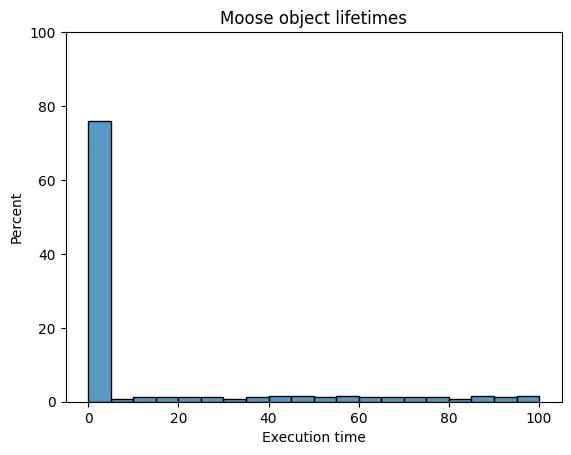

In [4]:
sns.histplot(moose_df['relativeLifetime'] , stat="percent", bins=20).set(xlabel='Execution time', title='Moose object lifetimes', ylim=(0, 100))

In [14]:
plot_lifetime_frequencies_by_class(moose_df, "Lifetime frequencies by most-allocated classes", top_allocated_classes, True)